In [14]:
import json, os, glob
import pandas as pd
import feather
from collections import Counter
from pathlib import Path

rows = []
links = []
count=0

json_dir = 'russianDataSets/ru/'
# Uses the json_dir variable to navigate to the dataset directory and 'get' all json files
json_pattern = os.path.join(json_dir, '*.json')

# Uses Glob with the json pattern variable to place all the json files and their directories in a list
file_list = glob.glob(json_pattern)

# directory to save data to
save_dir = "./russianTweetsContainingPutKremOliRus.ftr"

# Opens the JSON file
for file in file_list:
    with open(file, 'r') as f:
        for line in f:
            if count > 10000:
                break
            count = 0
            data = json.loads(line)
            
            # If there is a long version of the tweet
            if "extended_tweet" in data:
                data_list = data["extended_tweet"]["full_text"].split()
                for i in data_list:
                    # The strings in the following conditional can be substituted for other search params
                    if i.lower() == "путин" or i.lower() == "kремль" or i.lower() == "олигарх" or i.lower() == "россия":
                        count+=1
            # If there is only a short version of the tweet
            else:
                data_list = data["text"].split()
                for i in data_list:
                    # The strings in the following conditional can be substituted for other search params
                    if i.lower() == "путин" or i.lower() == "kремль" or i.lower() == "олигарх" or i.lower() == "россия":
                        count+=1

            if count >= 1:
                #username
                user_id = data["user"]["screen_name"]
                #location
                user_location = data["user"]["location"]
                #Tweet ID
                tweet_id = data["id_str"]
                #Hashtags
                hashtags = data["entities"]["hashtags"]
                #tweet text
                if "extended_tweet" in data:
                    text = data["extended_tweet"]["full_text"]
                else:
                    text = data["text"]
                rows.append((user_id, user_location, tweet_id, hashtags, text))
        
pd.options.display.max_colwidth = 500
datas = pd.DataFrame(rows, columns=["user_id", "user_location", "tweet_id", "hashtags", "text"])
datas.to_feather(save_dir)
display(datas)

,user_id,user_location,tweet_id,hashtags,text
0,asurepin,Екатеринбург,1234257130208800769,[],"RT @PetrosyanRob: Путин заявил, что негативное влияние коронавируса на экономику уже даёт о себе знать\n\nПутин который уничтожил экономику,…"
1,Old_Salt_,None,1234200861150191618,[],"RT @orangezaraza: Путин констатировал негативное влияние коронавируса на экономику.\nБлять ,бедный этот короновирус, его уже чуть ли не зако…"
2,Vasiamif,Минск,1234198248707043332,[],"RT @orangezaraza: Путин констатировал негативное влияние коронавируса на экономику.\nБлять ,бедный этот короновирус, его уже чуть ли не зако…"
3,asurepin,Екатеринбург,1234189429864124416,[],"RT @asurepin: Путин констатировал негативное влияние коронавируса на экономику. Ну и славно, теперь все 20 лет провалов и безудержного воро…"
4,Teletorn,"Tallinn, Eesti",1234186221175308288,[],"RT @orangezaraza: Путин констатировал негативное влияние коронавируса на экономику.\nБлять ,бедный этот короновирус, его уже чуть ли не зако…"
...,...,...,...,...,...
5727,dmitry94tamb,Россия,1277884736036311040,[],"В новостях сообщают, что к 2024 году планируют повсеместно внедрить дистанционное образование. А Путин орал, что такие слухи это ""провокация"". Очевидно же, что людей будут лишать нормального образования. Очевидно, что перевод школ на дистанционку только ради этого и затевался"
5728,tupaidefkamaksa,максим головного мозга🎀,1277870361300865025,[],@Plzsenpailovem1 И еще у них ищ телевизора началась пропаганда ГОЛОСОЕМ ЗА ПОПРАВКИ МЫ РОССИЯ МЫ ДОЛДНЫ ЦЕНИТЬ ИСТОРИЮ
5729,fake_LNR,ЛНР,1277865982258810880,[],"@AZurabAZ @tov_sobakin эти долбодятлы до 2036 будут искать, кто мешает Путину. В принципе уже можно начать культивировать тайное влияние инопланетян, с которыми 16 лет будет бороться Путин до нового обнуления в 2036-м! ""Голосуй за поправки, вместе победим инопланетян"""
5730,VVP2_0,None,1277839749462593537,[],"Песков назвал чушью, что Россия платила талибам за убийство американских военных.\n\nРанее Песков назвал чушью аннексию Россией Крыма, уничтожение Боинга, отравление Скрипалей в Великобритании, вмешательство в американские выборы."


{'я': 845, 'мы': 45, 'ты': 29, 'oни': 0, 'нас': 65, 'вы': 63, 'тебя': 12, 'меня': 19, 'тебе': 10, 'вами': 4, 'мне': 22}


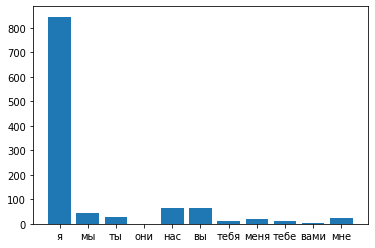

In [20]:
import re
import pandas as pd
import feather
import matplotlib.pyplot as plt

# adjustable file in ftr format
save_dir = "./russianTweetsContainingPutKremOliRus.ftr"

# reads contents of save_dir.ftr
read_ftr = pd.read_feather(save_dir, columns=None, use_threads=True);

# adjustable vocabulary list.
# only works if the words do not contain whitespace.
vocab = ["я", "мы", "ты", "oни", "нас", "вы", "тебя", "меня", "тебе", "вами", "мне"]

# series to list adapter
# Places all tweet text in a list, seperated by word.
s = (" ".join(read_ftr["text"]).split())

# creates a dictionary object where k=vocab[x] and v=counter
wordcount = dict((x,0) for x in vocab)

# for each w in text, if w is in the dictionary object, increase the respective counter.
for i in s:
    for w in re.findall(r"\w+", i):
        if w in wordcount:
            wordcount[w] += 1
            
# prints results to console.
print(wordcount)

plt.bar(range(len(wordcount)), list(wordcount.values()), align='center')
plt.xticks(range(len(wordcount)), list(wordcount.keys()))
plt.savefig('ru-2020-freq-of-pronouns.png')

Breakdown of above russian count to english translation:
I -> 886
We -> 45
You -> 118
They -> 63
Us -> 65